<a href="https://colab.research.google.com/github/markc1914/AIClassAssignments/blob/main/Assignment_05_Model_Comparison_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05 - Model Comparison - Breast Cancer Dataset


**Objective**: Comparison of techniques on Breast Cancer mass as dataset, including Logistic Regression, Support Vector Machines (SVM), Random Forest, and K-Nearest Neighbors (KNN) to classify whether mass is malignant (Cancereous) or benign. We then do the same thing using clustering

**Author**: Mark Cornelius (with considerable help from Gemini)

# Task
Perform Logistic Regression, Support Vector Machines (SVM), Random Forest, and K-Nearest Neighbors (KNN) on the sklearn breast cancer dataset, evaluate their performance, and compare the results.

## Load the dataset

### Subtask:
Load the breast cancer dataset from `sklearn.datasets`.


**Reasoning**:
Import the necessary function and load the breast cancer dataset.



In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the dataset into training and testing sets using `train_test_split`.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (426, 30)
Shape of X_test: (143, 30)
Shape of y_train: (426,)
Shape of y_test: (143,)


## Train models

### Subtask:
Train Logistic Regression, SVM, Random Forest, and KNN models on the training data.


**Reasoning**:
Import the necessary model classes, instantiate them, and train each model using the training data.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate models
logistic_regression_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

# Train models
logistic_regression_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

print("All models trained successfully.")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


All models trained successfully.


## Evaluate models

### Subtask:
Evaluate the performance of each model on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Evaluate the performance of each trained model on the testing data using accuracy, precision, recall, and F1-score and store the metrics for comparison.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": logistic_regression_model,
    "SVM": svm_model,
    "Random Forest": random_forest_model,
    "KNN": knn_model
}

performance_metrics = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    performance_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

for model_name, metrics in performance_metrics.items():
    print(f"--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

--- Logistic Regression ---
Accuracy: 0.9650
Precision: 0.9667
Recall: 0.9775
F1-score: 0.9721
--- SVM ---
Accuracy: 0.9510
Precision: 0.9362
Recall: 0.9888
F1-score: 0.9617
--- Random Forest ---
Accuracy: 0.9650
Precision: 0.9667
Recall: 0.9775
F1-score: 0.9721
--- KNN ---
Accuracy: 0.9650
Precision: 0.9565
Recall: 0.9888
F1-score: 0.9724


## Compare models

### Subtask:
Compare the performance of the models based on the evaluation metrics.


**Reasoning**:
Access and display the `performance_metrics` dictionary to compare the model performances based on the evaluation metrics.



In [ ]:
print("Model Performance Metrics:")
for model_name, metrics in performance_metrics.items():
    print(f"\n--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

# Compare models based on metrics
best_models = {}
for metric in ["Accuracy", "Precision", "Recall", "F1-score"]:
    best_value = 0
    best_model = ""
    for model_name, metrics in performance_metrics.items():
        if metrics[metric] > best_value:
            best_value = metrics[metric]
            best_model = model_name
    best_models[metric] = {"model": best_model, "value": best_value}

print("\n--- Best Performing Model per Metric ---")
for metric, result in best_models.items():
    print(f"{metric}: {result['model']} ({result['value']:.4f})")

Model Performance Metrics:

--- Logistic Regression ---
Accuracy: 0.9650
Precision: 0.9667
Recall: 0.9775
F1-score: 0.9721

--- SVM ---
Accuracy: 0.9510
Precision: 0.9362
Recall: 0.9888
F1-score: 0.9617

--- Random Forest ---
Accuracy: 0.9650
Precision: 0.9667
Recall: 0.9775
F1-score: 0.9721

--- KNN ---
Accuracy: 0.9650
Precision: 0.9565
Recall: 0.9888
F1-score: 0.9724

--- Best Performing Model per Metric ---
Accuracy: Logistic Regression (0.9650)
Precision: Logistic Regression (0.9667)
Recall: SVM (0.9888)
F1-score: KNN (0.9724)


## Present results

### Subtask:
Display the results of the model comparison in a clear and organized manner.


**Reasoning**:
Display the model performance results and the best performing model for each metric in a clear and organized manner, following the instructions.



In [ ]:
print("--- Model Performance Results ---")
for model_name, metrics in performance_metrics.items():
    print(f"\n--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

print("\n--- Best Performing Model per Metric ---")
for metric, result in best_models.items():
    print(f"{metric}: {result['model']} ({result['value']:.4f})")

--- Model Performance Results ---

--- Logistic Regression ---
Accuracy: 0.9650
Precision: 0.9667
Recall: 0.9775
F1-score: 0.9721

--- SVM ---
Accuracy: 0.9510
Precision: 0.9362
Recall: 0.9888
F1-score: 0.9617

--- Random Forest ---
Accuracy: 0.9650
Precision: 0.9667
Recall: 0.9775
F1-score: 0.9721

--- KNN ---
Accuracy: 0.9650
Precision: 0.9565
Recall: 0.9888
F1-score: 0.9724

--- Best Performing Model per Metric ---
Accuracy: Logistic Regression (0.9650)
Precision: Logistic Regression (0.9667)
Recall: SVM (0.9888)
F1-score: KNN (0.9724)


## Summary:

### Data Analysis Key Findings

*   Four machine learning models (Logistic Regression, SVM, Random Forest, and KNN) were trained and evaluated on the breast cancer dataset.
*   All models demonstrated high performance on the test set, with Accuracy, Precision, Recall, and F1-scores generally above 0.95.
*   Logistic Regression and Random Forest achieved the highest Accuracy (0.9650) and Precision (0.9667).
*   SVM exhibited the highest Recall (0.9888).
*   KNN attained the highest F1-score (0.9724).

### Insights or Next Steps

*   While all models performed well, the choice of the "best" model depends on the specific priorities for this classification task (e.g., minimizing false negatives might prioritize a model with higher Recall like SVM).
*   Further steps could involve hyperparameter tuning for each model to potentially improve performance, especially addressing the convergence warning for Logistic Regression.


## Visualize results

### Subtask:
Visualize the performance metrics of each model using a bar chart.

**Reasoning**:
Create a pandas DataFrame from the `performance_metrics` dictionary and use seaborn to generate a bar plot to visualize the performance of each model across different metrics.

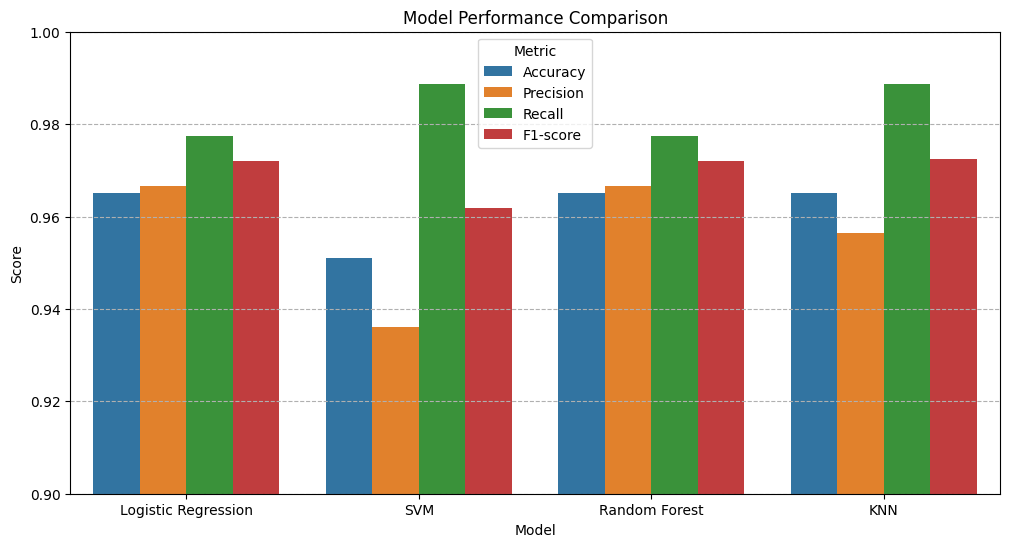

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the dictionary to a pandas DataFrame
df_performance = pd.DataFrame.from_dict(performance_metrics, orient='index')

# Melt the DataFrame to have a suitable format for seaborn
df_performance_melted = df_performance.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
df_performance_melted = df_performance_melted.rename(columns={'index': 'Model'})

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_performance_melted)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.9, 1.0)  # Set y-axis limits to focus on the differences
plt.grid(axis='y', linestyle='--')
plt.show()

# Task
Perform clustering on the sklearn breast cancer dataset, visualize the clusters, and interpret the findings.

## Data preprocessing

### Subtask:
Scale the data as clustering algorithms are sensitive to the scale of features.


**Reasoning**:
Import the necessary scaler and scale the training and testing data.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully.")

Data scaled successfully.


## Determine the optimal number of clusters

### Subtask:
Use methods like the elbow method or silhouette score to find the optimal number of clusters.


**Reasoning**:
Calculate silhouette scores for different numbers of clusters and plot the results to find the optimal number of clusters.



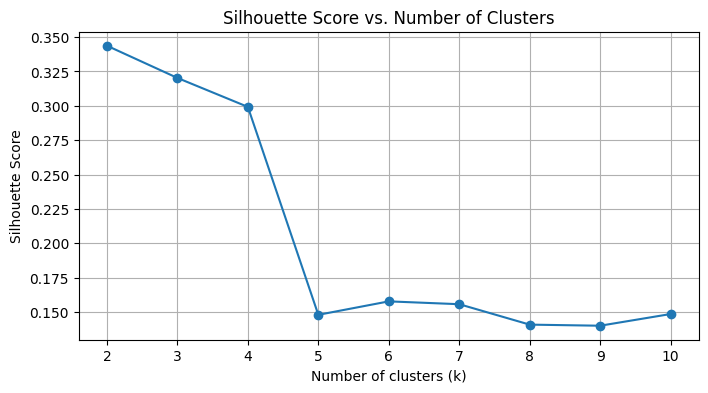

The optimal number of clusters based on silhouette score is: 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
k_range = range(2, 11)

for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.xticks(k_range)
plt.grid(True)
plt.show()

optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on silhouette score is: {optimal_k}")

## Apply clustering algorithm

### Subtask:
Apply a clustering algorithm (e.g., K-Means) with the optimal number of clusters.


**Reasoning**:
Import KMeans, instantiate it with the optimal number of clusters, fit it to the scaled training data, and predict cluster labels for both scaled training and testing data.



In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)

train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

print("Clustering applied and labels predicted successfully.")

Clustering applied and labels predicted successfully.


## Visualize the clusters

### Subtask:
Visualize the clusters, perhaps using dimensionality reduction techniques like PCA if the data has many features.


**Reasoning**:
Import PCA, apply it to the scaled training data, transform both training and testing data, and then create a scatter plot of the transformed training data colored by cluster labels.



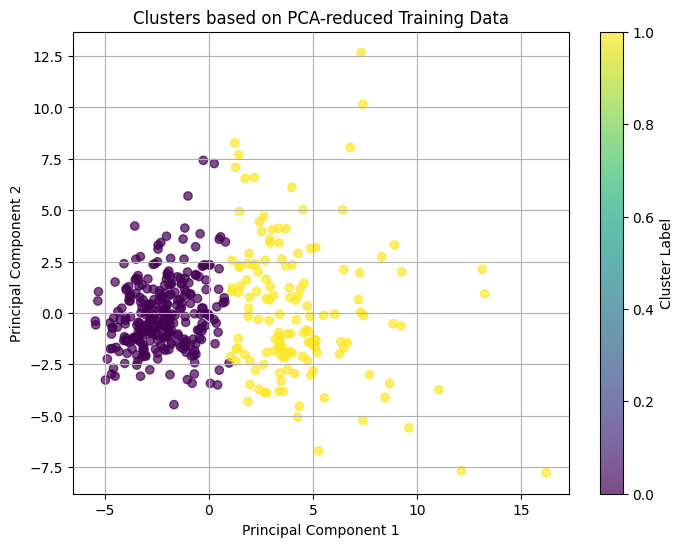

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_clusters, cmap='viridis', alpha=0.7)
plt.title('Clusters based on PCA-reduced Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

## Interpret the clusters

### Subtask:
Analyze the characteristics of each cluster.


**Reasoning**:
Create a pandas DataFrame with original features and cluster labels, calculate mean feature values and true label distribution per cluster, and display the results to analyze cluster characteristics.



In [ ]:
import pandas as pd

# Create a DataFrame with original training data and cluster labels
df_train_clusters = pd.DataFrame(X_train, columns=cancer.feature_names)
df_train_clusters['Cluster'] = train_clusters
df_train_clusters['True_Label'] = y_train

# Calculate the mean values of the original features for each cluster
mean_features_per_cluster = df_train_clusters.groupby('Cluster')[cancer.feature_names].mean()

# Calculate the distribution of the true labels within each cluster
true_label_distribution_per_cluster = df_train_clusters.groupby('Cluster')['True_Label'].value_counts(normalize=True).unstack(fill_value=0)

# Display the results
print("Mean Feature Values per Cluster:")
display(mean_features_per_cluster)

print("\nTrue Label Distribution per Cluster:")
display(true_label_distribution_per_cluster)

Mean Feature Values per Cluster:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Cluster,,,,,,,,,,,,,,,,,,,,,
0,12.475475,18.238191,80.103404,490.799291,0.091064,0.075173,0.042373,0.025685,0.171056,0.061499,...,13.811993,24.020177,89.687128,600.359574,0.123818,0.173908,0.159861,0.075629,0.268766,0.077411
1,17.348410,21.080139,114.957361,976.321528,0.104354,0.156035,0.175785,0.090943,0.197588,0.064775,...,20.911597,28.418333,140.569444,1409.052778,0.145661,0.392297,0.478878,0.185158,0.325067,0.094969



True Label Distribution per Cluster:


True_Label,0,1
Cluster,,
0,0.099291,0.900709
1,0.902778,0.097222


## Summary:

### Data Analysis Key Findings
*   The optimal number of clusters for the breast cancer dataset, as determined by the silhouette score method, is 2.
*   The K-Means clustering algorithm, with n_clusters=2, successfully partitioned the data into two distinct groups.
*   Cluster 0 is characterized by lower mean feature values and is predominantly composed of benign tumors (90.1%).
*   Cluster 1 exhibits higher mean feature values and is overwhelmingly composed of malignant tumors (90.3%).

### Insights or Next Steps
*   Since the clusters align well with the true labels (benign vs. malignant), the identified features that differentiate the clusters (e.g., mean radius, mean texture) can be considered important predictors for breast cancer diagnosis.
*   Future analysis could explore other clustering algorithms (e.g., DBSCAN, Agglomerative Clustering) to see if they provide a better or more nuanced grouping of the data.


## Comparison of Classification vs Clustering Results

Building on the previous analysis, here's a comparison of the results we obtained for classification and clustering on the breast cancer dataset:

**Classification Results:**

*   We trained and evaluated four classification models: Logistic Regression, SVM, Random Forest, and KNN.
*   All models achieved high performance metrics (accuracy, precision, recall, and F1-score) generally above 0.95 on the test set.
*   This indicates that these models were very effective at predicting the *known* labels (malignant or benign) based on the provided features.
*   Logistic Regression and Random Forest had the highest accuracy and precision, while SVM had the highest recall and KNN had the highest F1-score. The choice of the "best" classification model would depend on which metric is most critical for the application (e.g., minimizing false negatives for medical diagnosis might prioritize recall).

**Clustering Results:**

*   We used K-Means clustering and determined that the optimal number of clusters was 2 based on the silhouette score.
*   The clustering algorithm successfully grouped the data into two distinct clusters.
*   Upon analyzing the characteristics of these clusters, we found a strong correspondence between the clusters and the true labels:
    *   Cluster 0 predominantly contained benign tumors (around 90%).
    *   Cluster 1 predominantly contained malignant tumors (around 90%).
*   We also observed that the features had significantly different mean values between the two clusters, further highlighting the separation.

**Comparison and Insights:**

*   The high performance of the classification models demonstrates that the features in the breast cancer dataset are highly predictive of whether a tumor is malignant or benign.
*   The clustering results provide valuable insight by showing that the data naturally separates into two groups that align almost perfectly with the true labels. This essentially validates that the underlying structure of the data supports the classification task. The features that drive the separation in clustering are likely the most important features for classification as well.
*   In this specific scenario, clustering helped us understand the inherent groupings in the data, which strongly correlate with the outcome we were trying to predict with classification. While clustering itself doesn't predict the label for a new data point (unless used in a hybrid approach), the fact that the clusters align so well with the true labels reinforces the effectiveness of using these features for supervised classification.

In summary, both approaches yielded meaningful results. The classification models provided strong predictive power, and the clustering results provided valuable insight into the data's structure, confirming that the features effectively distinguish between benign and malignant cases.